In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [2]:
df=pd.read_csv('USvideos.csv')
PLOT_COLORS=["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format='{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure',figsize=(8,5),dpi=100)
plt.rc('axes',labelpad=20,facecolor='#ffffff',linewidth=.4,grid=True,labelsize=14)
plt.rc('patch',linewidth=0)
plt.rc('xtick.major',width=.2)
plt.rc('ytick.major',width=.2)
plt.rc('grid',color='#9E9E9E',linewidth=.4)
plt.rc('font',family='Arial',weight='400',size=10)
plt.rc('text',color='#282828')
plt.rc('savefig',pad_inches=.3,dpi=300)

In [3]:
df['description']=df['description'].fillna(value=" ")

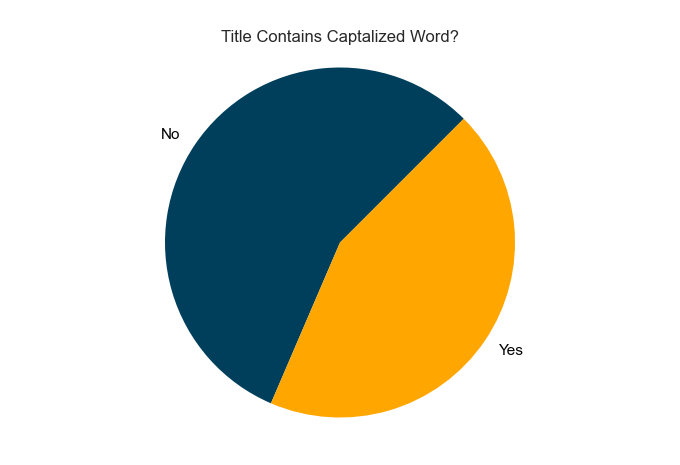

In [4]:
def contains_capitalized_words(s):
    for w in s.split():
        if w.isupper():return True
    return False

df['contains_capitalized']=df['title'].apply(contains_capitalized_words)
value_counts=df['contains_capitalized'].value_counts().to_dict()
fig,ax=plt.subplots()
_=ax.pie([value_counts[False],value_counts[True]],labels=["No","Yes"],colors=["#003f5c",'#ffa600'],textprops={'color':'#040204'},startangle=45)
_=ax.axis('equal')
_=ax.set_title('Title Contains Captalized Word?')

C:\Users\thaku\AppData\Local\Temp\ipykernel_15108\3436799305.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df['Title_length'],kde=False,rug=False,color=PLOT_COLORS[4],hist_kws={'alpha':1},ax=ax)


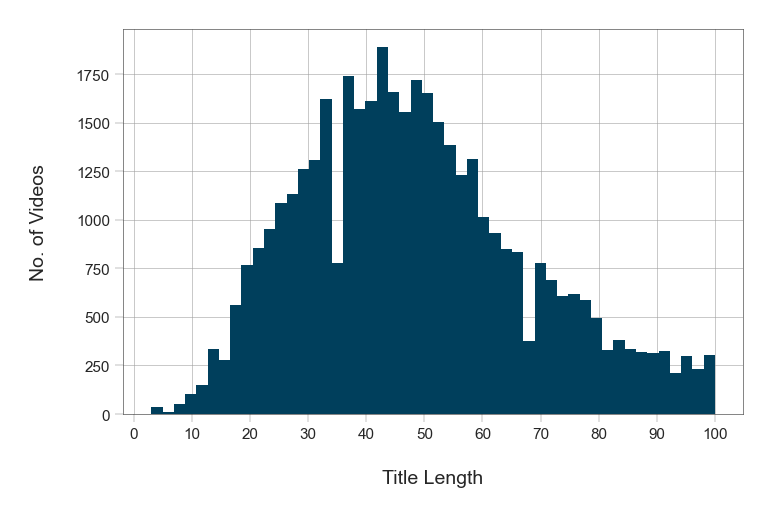

In [5]:
df["Title_length"]=df['title'].apply(lambda x:len(x))
fig,ax=plt.subplots()
_=sns.distplot(df['Title_length'],kde=False,rug=False,color=PLOT_COLORS[4],hist_kws={'alpha':1},ax=ax)
_=ax.set(xlabel='Title Length',ylabel="No. of Videos",xticks=range(0,110,10))

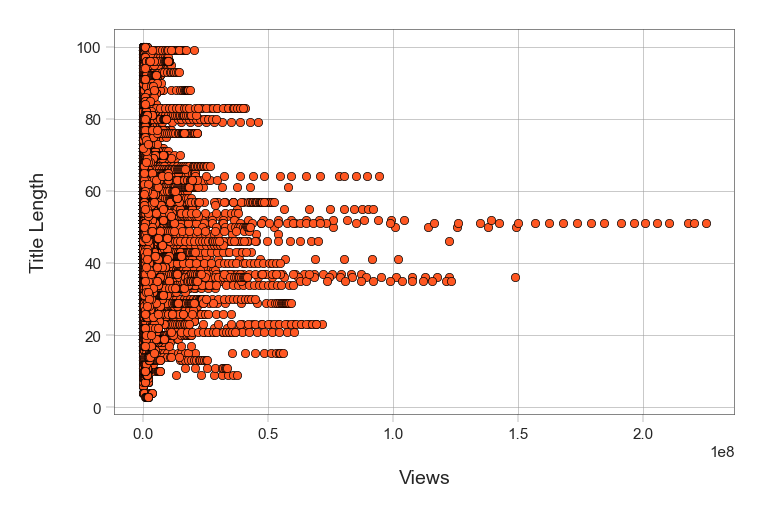

In [6]:
fig,ax=plt.subplots()
_=ax.scatter(x=df['views'],y=df['Title_length'],color=PLOT_COLORS[2],edgecolors='#000000',linewidths=.5)
_=ax.set(xlabel='Views',ylabel='Title Length')

<Axes: >

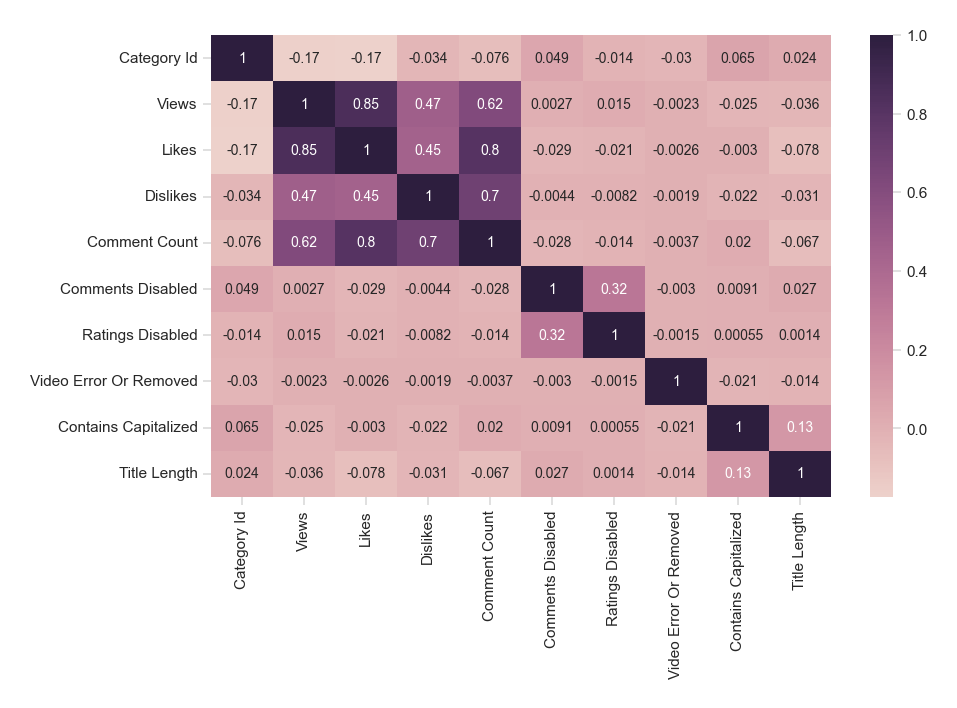

In [8]:
numeric_columns = df.select_dtypes(include=["number", 'bool']).columns
df_numeric = df[numeric_columns]

# Create labels for the heatmap
h_labels = [x.replace('_', " ").title() for x in list(df_numeric.columns.values)]

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)


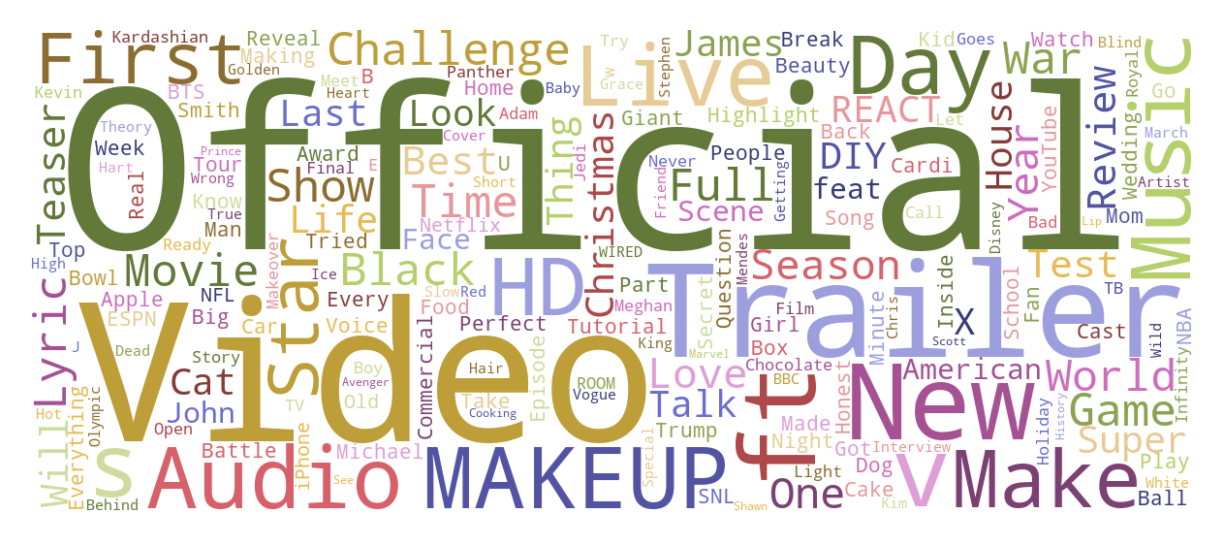

In [11]:
title_words=list(df['title'].apply(lambda x:x.split()))
title_words=[x for y in title_words for x in y]
wc=wordcloud.WordCloud(width=1200,height=500,collocations=False,background_color='white',colormap='tab20b').generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc,interpolation='bilinear')
_=plt.axis('off')